# 0. Install and Import dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 966 kB 9.4 MB/s 
     |████████████████████████████████| 2.8 MB 18.3 MB/s 
Reason for being yanked: re-release with new wheels
  Attempting uninstall: atari-py
    Found existing installation: atari-py 0.2.9
    Uninstalling atari-py-0.2.9:
      Successfully uninstalled atari-py-0.2.9


In [3]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import tensorflow as tf
!pip install yfinance
import yfinance as yf

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#!pip install "gym==0.19.0"

# 1. Bring in Marketwatch BTC Data

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
tickers = ['BTC-USD']
start_date = '2020-01-01'
end_date = '2022-11-20'

In [7]:
df = yf.download(tickers, start=start_date, end=end_date, adjusted=True)

[*********************100%***********************]  1 of 1 completed


In [8]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df = df.drop(['Adj Close'], axis=1)


In [10]:
df.sort_values('Date', ascending=True, inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095
...,...,...,...,...,...
2022-11-15,16617.484375,17051.962891,16542.550781,16884.613281,36599436183
2022-11-16,16884.341797,16960.294922,16430.111328,16669.439453,33925512989
2022-11-17,16670.425781,16726.439453,16460.683594,16687.517578,27868914022


In [11]:
len(df)

1054

In [12]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,500), window_size=5)

In [13]:
env.signal_features

array([[ 7.76921924e+03,  0.00000000e+00],
       [ 8.16369238e+03,  3.94473145e+02],
       [ 8.07986279e+03, -8.38295898e+01],
       [ 7.87907129e+03, -2.00791504e+02],
       [ 8.16655420e+03,  2.87482910e+02],
       [ 8.03753760e+03, -1.29016602e+02],
       [ 8.19249414e+03,  1.54956543e+02],
       [ 8.14419434e+03, -4.82998047e+01],
       [ 8.82776465e+03,  6.83570312e+02],
       [ 8.80701074e+03, -2.07539062e+01],
       [ 8.72378613e+03, -8.32246094e+01],
       [ 8.92903809e+03,  2.05251953e+02],
       [ 8.94280859e+03,  1.37705078e+01],
       [ 8.70624512e+03, -2.36563477e+02],
       [ 8.65764258e+03, -4.86025391e+01],
       [ 8.74589453e+03,  8.82519531e+01],
       [ 8.68087598e+03, -6.50185547e+01],
       [ 8.40651562e+03, -2.74360352e+02],
       [ 8.44543457e+03,  3.89189453e+01],
       [ 8.36784766e+03, -7.75869141e+01],
       [ 8.59683008e+03,  2.28982422e+02],
       [ 8.90981934e+03,  3.12989258e+02],
       [ 9.35858984e+03,  4.48770508e+02],
       [ 9.

# 2. Build Environment

In [14]:
env.action_space

Discrete(2)

info {'total_reward': 59833.03125, 'total_profit': 0.9543778315949814, 'position': 0}


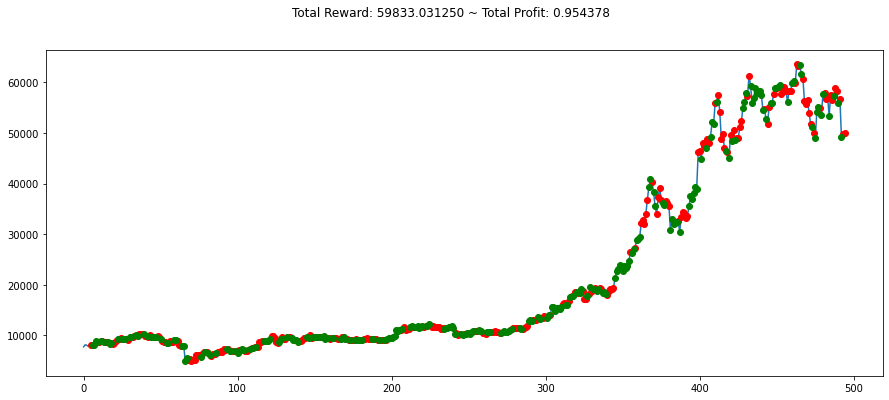

In [15]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [16]:
!pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from gym_anytrading.envs import StocksEnv
from finta import TA
import mplfinance as mpf
#!pip install wandb
import tensorboard

## 2.1.2. Fix Volume Column

In [19]:
#df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))
df['Volume'] = df['Volume'].astype(np.float64)

In [20]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [21]:
#df = df.rename(columns={"Open":"open","High":"high","Low":"low","Close":"close","Volume":"volume", })

## 2.1.3. Calculate RSI, EMA, MACD and BOLLINGER BANDS

In [22]:
#df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['EMA'] = TA.EMA(df,200)
#MACD
#BBANDS
#EMA

In [23]:
macd = TA.MACD(df)
df['MACD'] = macd['MACD']
df['SIGNAL'] = macd['SIGNAL']

In [24]:
bbands = TA.BBANDS(df, 20)
df['BB_UPPER'] = bbands['BB_UPPER']
df['BB_MIDDLE'] = bbands['BB_MIDDLE']
df['BB_LOWER'] = bbands['BB_LOWER']

In [25]:
df.fillna(0, inplace=True)

In [26]:
df

,Open,High,Low,Close,Volume,RSI,EMA,MACD,SIGNAL,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,1.856566e+10,0.000000,7200.174316,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,2.080208e+10,0.000000,7092.285505,-4.817079,-2.676155,0.000000,0.000000,0.000000
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,2.811148e+10,64.320963,7177.328488,5.007494,0.472881,0.000000,0.000000,0.000000
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,1.844427e+10,68.334871,7236.538434,11.727871,4.285547,0.000000,0.000000,0.000000
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,1.972507e+10,68.373359,7272.196817,15.159010,7.520156,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,16617.484375,17051.962891,16542.550781,16884.613281,3.659944e+10,37.397984,24226.221100,-869.133655,-492.353627,23027.157721,19167.175537,15307.193353
2022-11-16,16884.341797,16960.294922,16430.111328,16669.439453,3.392551e+10,36.333645,24151.027193,-897.546406,-573.392183,22962.754903,18986.355713,15009.956523
2022-11-17,16670.425781,16726.439453,16460.683594,16687.517578,2.786891e+10,36.497166,24076.761411,-908.136530,-640.341052,22818.188362,18790.964014,14763.739666


In [27]:
bands_plot = pd.concat([df.BB_UPPER, df.BB_LOWER], axis=1)

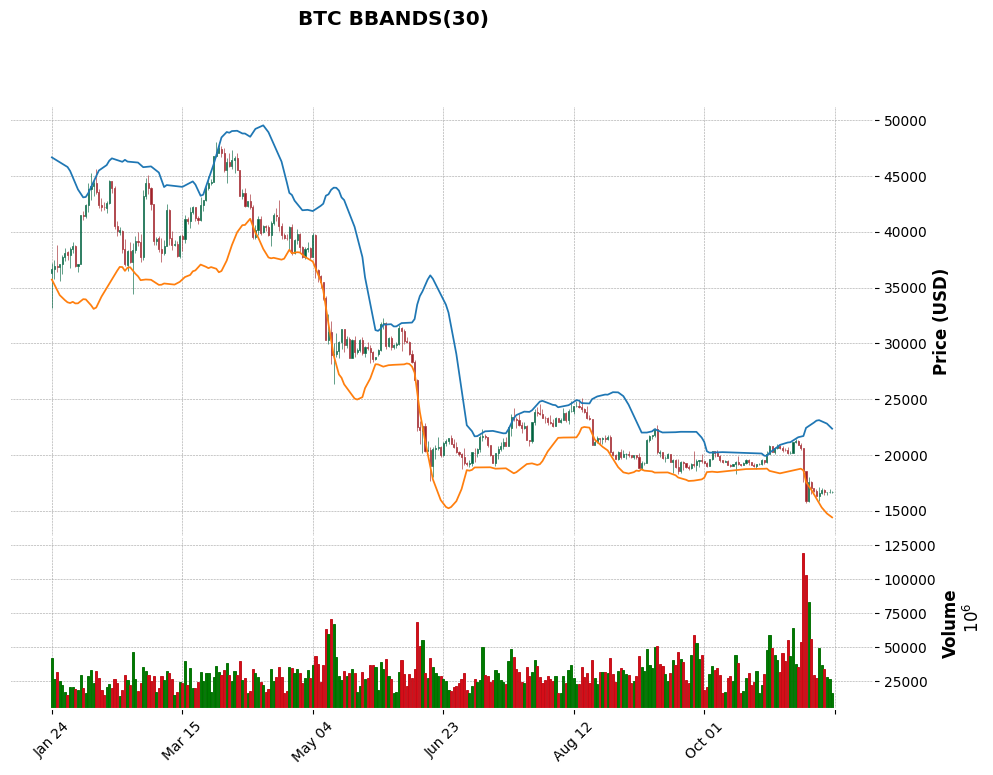

In [28]:
apd = mpf.make_addplot(bands_plot.tail(300))

mpf.plot(df.tail(300), type='candle', style='charles',
        title='BTC BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

## 2.1.4. Create New Environments

In [29]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','EMA', 'RSI', 'MACD', 'SIGNAL', 'BB_UPPER', 'BB_LOWER']].to_numpy()[start:end]
    return prices, signal_features

In [30]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,900))

In [ ]:
env2.prices

In [37]:
len(df)

1054

# 3. Build Environment and Train

In [33]:
log_path = '/content/gdrive/MyDrive/Colab Notebooks/Reinforcement-Learning-Stocks-Trading/Training/Logs'

In [34]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
'''
from stable_baselines.common.callbacks import EvalCallback

# Use deterministic actions for evaluation
eval_callback = EvalCallback(env, best_model_save_path='/content/gdrive/MyDrive/Colab Notebooks/Reinforcement-Learning-Stocks-Trading/Training/Saved Models',
                             log_path='/content/gdrive/MyDrive/Colab Notebooks/Reinforcement-Learning-Stocks-Trading/Training/Logs', eval_freq=500,
                             verbose=1)
'''

In [35]:
model = A2C('MlpLstmPolicy', env, verbose=1, tensorboard_log = log_path) 
model.learn(total_timesteps=1000000) #,callback= eval_callback





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





---------------------------------
| explained_variance | 8.39e-05 |
| fps                | 16       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 2.23e+05 |
---------------------------------
---------------------------------
| explained_variance | 3.52e-06 |
| fps                | 361      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 1.66e+06 |
---------------------------------


Output streaming troncato alle ultime 5000 righe.
---------------------------------
| explained_variance | -0.00452 |
| fps                | 473      |
| nupdates           | 137600   |
| policy_entropy     | 0.515    |
| total_timesteps    | 688000   |
| value_loss         | 1.2e+06  |
---------------------------------
---------------------------------
| explained_variance | -1.76    |
| fps                | 473      |
| nupdates           | 137700   |
| policy_entropy     | 0.566    |
| total_timesteps    | 688500   |
| value_loss         | 2.47e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.16     |
| fps                | 473      |
| nupdates           | 137800   |
| policy_entropy     | 0.536    |
| total_timesteps    | 689000   |
| value_loss         | 145      |
---------------------------------
---------------------------------
| explained_variance | -10.3    |
| fps                | 473      |
| nupdates           | 137900   

In [36]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/Reinforcement-Learning-Stocks-Trading/Training/Saved Models/A2C')
#model = A2C.load('/content/gdrive/MyDrive/Colab Notebooks/Reinforcement-Learning-Stocks-Trading/Training/Saved Models/A2C_1', env=env)

In [ ]:
#!pip install --upgrade tensorboard

In [53]:
training_log_path = ('/content/gdrive/MyDrive/Colab Notebooks/Reinforcement-Learning-Stocks-Trading/Training/Logs/A2C_3/events.out.tfevents.1669385417.9fbf6f130178')

In [49]:
!tensorboard --logdir=[training_log_path] --host localhost --port 8088

TensorBoard 1.15.0 at http://localhost:8088/ (Press CTRL+C to quit)


# 4. Evaluation

In [48]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(900,930))#270 300
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1583.943359375, 'total_profit': 1.0639194502416855, 'position': 1}


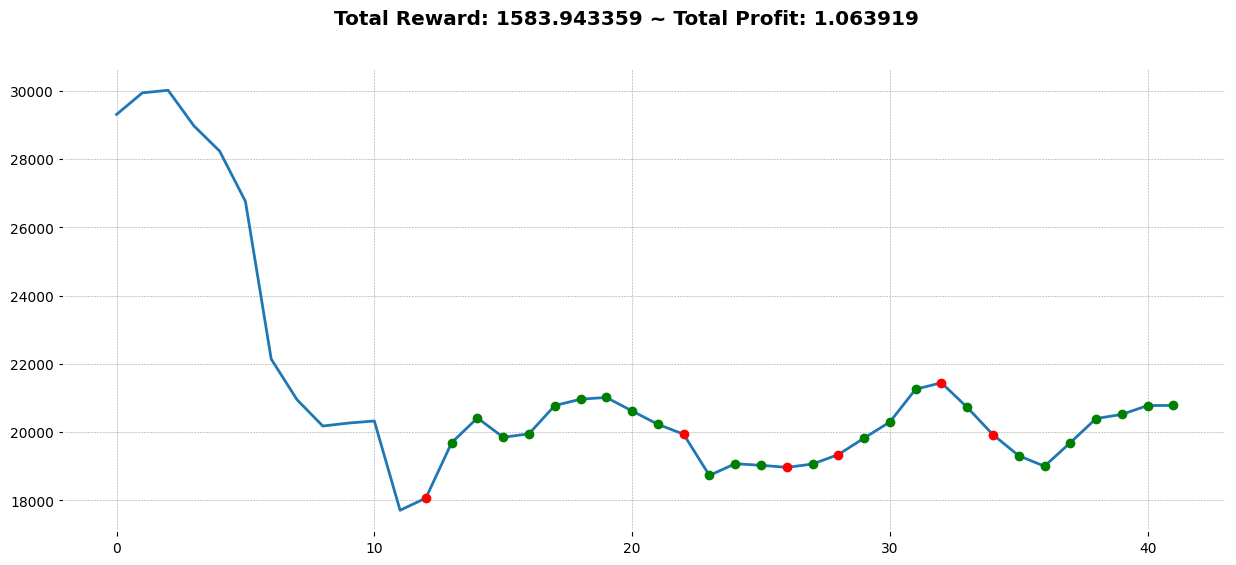

In [49]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
#!pip install quantstats
import quantstats as qs

qs.extend_pandas()
end = len(df)
net_worth = pd.Series(env.history['total_profit'], index=df.index[12: end])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

In [56]:
del model
model = A2C('MlpLstmPolicy', env, verbose=1, tensorboard_log = log_path) 
model.learn(total_timesteps=280000) #,callback= eval_callback

Wrapping the env in a DummyVecEnv.
----------------------------------
| explained_variance | -1.09e+03 |
| fps                | 13        |
| nupdates           | 1         |
| policy_entropy     | 0.693     |
| total_timesteps    | 5         |
| value_loss         | 0.00291   |
----------------------------------
---------------------------------
| explained_variance | 5.56e-05 |
| fps                | 286      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 5.14e+05 |
---------------------------------
---------------------------------
| explained_variance | -47.9    |
| fps                | 359      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 0.002    |
---------------------------------
---------------------------------
| explained_variance | 8.15e-05 |
| fps                | 389      |
| nupdates           | 300      |
| pol

In [57]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/Reinforcement-Learning-Stocks-Trading/Training/Saved Models/A2C')

In [69]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(900,950))#270 300
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1749.73828125, 'total_profit': 1.0804387325842788, 'position': 1}


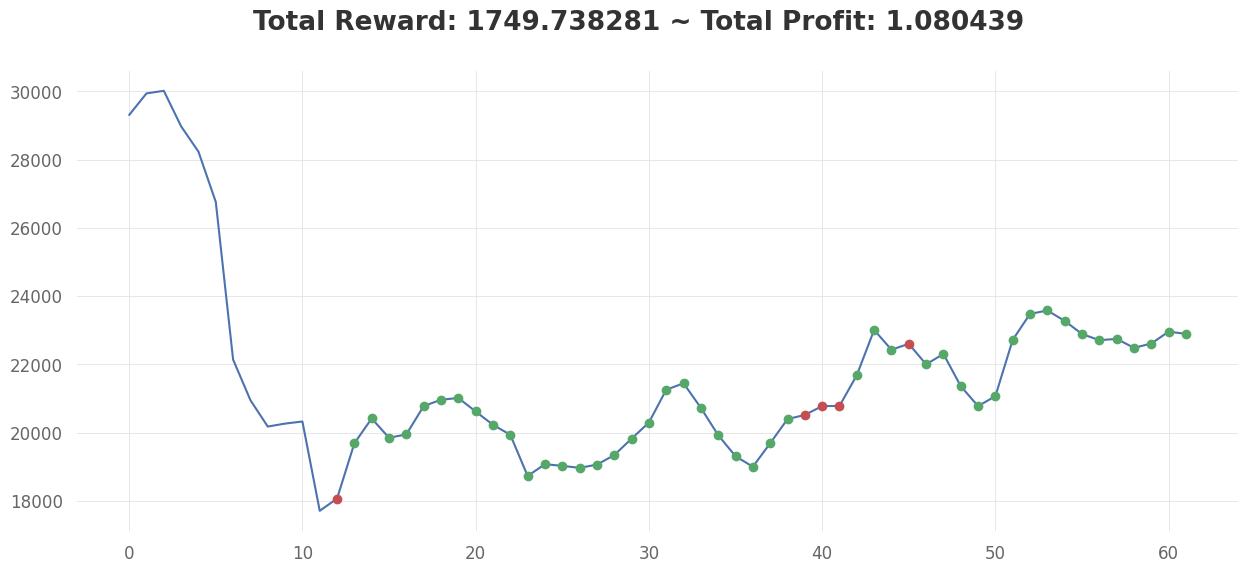

In [70]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()